# Họ tên: Nguyễn Vũ Hải
# Lớp: CNTT K18 CLC
# Mã SV: DTC195480201CLC0006

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd

In [3]:
df_salary = pd.read_csv("Salaries.csv")
df_salary.head()

C:\Users\mamto\AppData\Local\Temp\ipykernel_15232\15317537.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_salary = pd.read_csv("Salaries.csv")


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [27]:
df_salary.BasePay = pd.to_numeric(df_salary.BasePay, errors='coerce')
df_salary.OvertimePay = pd.to_numeric(df_salary.OvertimePay, errors='coerce')

Bài 1. Hãy dùng hàm groupby để hiển thị trung bình lương (TotalPay) theo năm (Year).

In [7]:
df_salary[["TotalPay","Year"]].groupby("Year").sum()

,TotalPay
Year,
2011,2.594195e+09
2012,2.724848e+09
2013,2.918656e+09
2014,2.876911e+09


Bài 2. Hãy dùng hàm `groupby` để hiển thị tổng lương (TotalPay) theo năm. Sắp xếp theo thứ tự giảm dần.

In [11]:
df_salary[["TotalPay","Year"]].groupby("Year").sum().sort_values("Year",ascending = False)

,TotalPay
Year,
2014,2.876911e+09
2013,2.918656e+09
2012,2.724848e+09
2011,2.594195e+09


Bài 3. Hiển thị số lượng công việc khác nhau trong dataframe `sal_df`.

In [12]:
df_salary.JobTitle.count()

148654

Bài 4. Điền giá trị 0.0 cho các ô trống trong `sal_df`.

In [14]:
df_salary = df_salary.replace(np.nan,0)
print(f"Kiểm tra null trong bảng {df_salary.isnull().sum()}")

Kiểm tra null trong bảng Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64


Bài 5. Tìm tên nhân viên có mức lương cao 

In [25]:
df_salary[["EmployeeName","BasePay"]].groupby("EmployeeName").sum().sort_values("BasePay",ascending = False).head(1)

,BasePay
EmployeeName,
Kevin Lee,1142948.78


Bài 6. Vẽ đồ thị dạng histogram của tiền lương ngoài giờ (OvertimePay).

<AxesSubplot: >

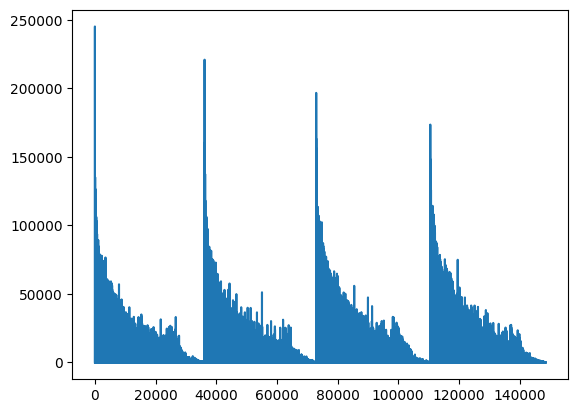

In [28]:
df_salary.OvertimePay.plot()

Bài 7. Hợp nhất 2 df từ 2 bảng `orders` và `customers`

In [33]:
df_orders = pd.read_csv("orders.csv")
df_customers = pd.read_csv("customers.csv")

In [49]:
print(df_orders.shape)
df_orders.head()

(2000, 4)


,id,customer_id,product_id,delivery_country
0,0,1866,686,India
1,1,1921,617,China
2,1,1921,54,Armenia
3,1,1921,566,China
4,1,1921,128,Lebanon


In [51]:
print(df_customers.shape)
df_customers.head()

(519, 3)


,id,name,billing_country
0,1,Serenity Ladner,Canada
1,2,Lucy Baldwin,Canada
2,5,Skylar Coffman,USA
3,6,Riley Kinsey,USA
4,7,Heidi Spurlock,Canada


In [56]:
joined_df = df_customers.merge(df_orders,how="left", left_on = ["id"], right_on = ["customer_id"])
joined_df

,id_x,name,billing_country,id_y,customer_id,product_id,delivery_country
0,1,Serenity Ladner,Canada,189.0,1.0,307.0,Canada
1,1,Serenity Ladner,Canada,189.0,1.0,508.0,Poland
2,1,Serenity Ladner,Canada,949.0,1.0,431.0,Canada
3,1,Serenity Ladner,Canada,949.0,1.0,592.0,Canada
4,2,Lucy Baldwin,Canada,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2092,2095,Ngo Vuong,Vietnam,303.0,2095.0,25.0,Vietnam
2093,2095,Ngo Vuong,Vietnam,303.0,2095.0,650.0,Vietnam
2094,2095,Ngo Vuong,Vietnam,494.0,2095.0,208.0,Vietnam
2095,2095,Ngo Vuong,Vietnam,494.0,2095.0,211.0,Vietnam
